In [9]:
# Core scverse libraries
import scanpy as sc
import anndata as ad
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

# Data retrieval
import pooch

# Set seed
import random
random.seed(1)

# Generation HVG file
import re

In [11]:
# Figure settings and figure directory 
sc.settings.set_figure_params(dpi=250, facecolor="white", figsize = (12, 12))
sc.settings.figdir = 'YOUR_PATH_HERE'

In [14]:
# Load in the Anndata object
adata = sc.read_h5ad('YOUR_PATH_HERE')
adata

In [8]:
# Make a list with GO_CELL_SURFACE Markers
surface_markers = ("AAMP,ABCA1,ABCA7,ABCB1,ABCB11,ABCC2,ABCC4,ABCG1,ABCG2,ACE,ACE2,ACHE,ACKR2,ACKR3,ACKR4,ACVR1B,ACVR2A,ACVRL1,ADA,ADAM10,ADAM15,ADAM17,ADAM2,ADAM20,ADAM21,ADAM29,ADAM30,ADAM8,ADAM9,ADAMTS13,ADAMTS15,ADAMTS7,ADAMTS9,ADCYAP1R1,ADGRA2,ADGRA3,ADGRE1,ADGRF5,ADGRG2,ADGRG6,ADGRV1,ADIPOQ,ADRA2B,ADTRP,AGER,AIMP1,AJAP1,ALCAM,ALPP,AMBP,AMELX,AMOT,ANGPTL3,ANK3,ANO6,ANOS1,ANPEP,ANTXR1,ANTXR2,ANTXRL,ANXA1,ANXA2,ANXA4,ANXA5,ANXA9,AOC3,APMAP,APOA4,APOH,APP,AQP11,AQP4,AREG,ARSB,ART1,ASGR1,ASGR2,ASIC1,ASTN1,ATP1A2,ATP1B2,ATP5F1A,ATP5F1B,ATP5IF1,ATP6AP2,AXL,AZGP1,B2M,B4GALT1,BACE1,BCAM,BGN,BMP10,BMP2,BMPR1A,BMPR2,BSN,BSPH1,BST2,BTN1A1,BTN2A1,BTN2A2,BTN2A3P,BTN3A1,BTN3A2,BTN3A3,BTNL10P,BTNL2,BTNL3,BTNL8,BTNL9,C17orf99,C1QBP,C3,CA4,CACNG2,CACNG4,CALR,CAPN2,CAPN5,CASR,CAV3,CCR1,CCR10,CCR2,CCR3,CCR4,CCR5,CCR6,CCR7,CCR8,CCR9,CCRL2,CD109,CD14,CD151,CD163,CD163L1,CD19,CD1A,CD1B,CD1C,CD1D,CD1E,CD2,CD200,CD200R1,CD200R1L,CD207,CD209,CD22,CD226,CD24,CD244,CD248,CD27,CD274,CD276,CD28,CD302,CD33,CD34,CD36,CD38,CD3D,CD3E,CD3G,CD4,CD40,CD40LG,CD44,CD46,CD47,CD5,CD53,CD55,CD58,CD59,CD5L,CD6,CD63,CD69,CD74,CD79A,CD79B,CD80,CD83,CD84,CD86,CD8A,CD8B,CD8B2,CD9,CD93,CD99L2,CDH13,CDH17,CDH2,CDH5,CEACAM1,CEACAM19,CEACAM20,CEACAM21,CEACAM3,CEACAM4,CEACAM5,CEACAM6,CEACAM7,CEACAM8,CFC1,CFC1B,CFTR,CHADL,CHRNA1,CHRNA4,CHRNB2,CLCN3,CLDND1,CLEC10A,CLEC12B,CLEC14A,CLEC17A,CLEC1B,CLEC2B,CLEC2D,CLEC4A,CLEC4C,CLEC4D,CLEC4E,CLEC4F,CLEC4G,CLEC4M,CLEC5A,CLEC6A,CLEC7A,CLEC9A,CLIC4,CLMP,CLPTM1,CLSTN1,CLSTN2,CLSTN3,CLU,CNTFR,CNTNAP2,COL23A1,COLEC10,COLEC11,CORIN,CPM,CR1,CRIPTO,CRIPTO3,CRLF1,CRLF2,CRYAB,CSF1R,CSF2RA,CSF2RB,CSF3R,CSPG4,CSPG5,CST8,CTLA4,CTNND1,CTSB,CTSK,CUBN,CUZD1,CX3CL1,CX3CR1,CXCL10,CXCL12,CXCL9,CXCR1,CXCR2,CXCR3,CXCR4,CXCR5,CXCR6,CYP2W1,DAG1,DCBLD2,DCC,DCSTAMP,DIP2A,DMD,DNAI2,DPP4,DSCAML1,DSG2,DUOX1,DUOX2,EBI3,ECE1,EFNA5,EFNB1,EGFL7,EGFL8,EGFR,ELANE,ELSPBP1,EMP2,ENG,ENO1,ENOX1,ENOX2,ENPEP,ENPP1,ENPP3,ENTPD6,EPCAM,EPHA2,EPHA4,EPHA5,EPHB2,EPO,EPOR,EPPIN,ERMAP,ERP29,ERP44,F10,F2,F2R,F3,FAM234A,FAP,FAS,FASLG,FCER1A,FCER1G,FCER2,FCGR1A,FCGR1BP,FCGR2A,FCGR2B,FCGR2C,FCGR3A,FCGR3B,FCGRT,FCN1,FCN2,FCN3,FCRL1,FCRL2,FCRL3,FCRL4,FCRL5,FCRL6,FCRLA,FCRLB,FERMT2,FGA,FGB,FGF10,FGF8,FGFBP1,FGFR2,FGFR3,FGG,FLOT1,FLT3LG,FOLH1,FOLR1,FOLR2,FOLR3,FURIN,FUT4,FZD1,FZD10,FZD3,FZD4,FZD5,FZD6,FZD9,GFRA1,GFRA2,GFRA3,GFRA4,GFRAL,GHR,GHRHR,GHSR,GJD3,GLDN,GLRA1,GP1BA,GP2,GP6,GPC1,GPC2,GPC3,GPC4,GPC5,GPC6,GPIHBP1,GPR37,GPRC5B,GREM1,GRIA1,GRIA2,GRIN1,GRIN2A,GRIN2B,GSR,H1-1,H2BC1,HAVCR1,HAVCR2,HBEGF,HCST,HEG1,HFE,HHIP,HHLA2,HILPDA,HJV,HLA-A,HLA-B,HLA-C,HLA-DMA,HLA-DPA1,HLA-DPB1,HLA-DRA,HLA-DRB1,HLA-E,HLA-F,HLA-G,HLA-H,HM13,HMGB1,HMMR,HNRNPU,HPN,HRG,HSP90AA1,HSP90AB1,HSPA2,HSPA5,HSPA8,HSPD1,HTR3B,HYAL2,HYAL4,ICAM1,ICOSLG,IDE,IGF2R,IGHM,IGSF21,IGSF3,IGSF5,IL11RA,IL12B,IL12RB1,IL12RB2,IL13,IL13RA1,IL13RA2,IL15RA,IL17A,IL17RC,IL1A,IL1R1,IL1RAPL1,IL1RL1,IL21R,IL23R,IL27,IL27RA,IL2RA,IL2RB,IL2RG,IL31RA,IL3RA,IL4R,IL5RA,IL6R,IL6ST,IL7R,IL9R,INSR,INTU,IQGAP2,IRAK1,IRAK4,ISLR2,ITGA1,ITGA10,ITGA11,ITGA2,ITGA2B,ITGA3,ITGA4,ITGA5,ITGA6,ITGA7,ITGA8,ITGA9,ITGAD,ITGAE,ITGAL,ITGAM,ITGAV,ITGAX,ITGB1,ITGB2,ITGB3,ITGB4,ITGB5,ITGB6,ITGB7,ITGB8,ITGBL1,IZUMO1R,JAM2,KCNA1,KCNA5,KCNB1,KCNC1,KCNE1,KCNE2,KCNH2,KCNH5,KCNJ3,KCNK2,KCNN2,KCNQ3,KDR,KISS1R,KIT,KLRB1,KLRC1,KLRC2,KLRC3,KLRC4,KLRC4-KLRK1,KLRD1,KLRK1,KRT10,KRT4,L1CAM,LAG3,LAMP1,LAMP3,LAYN,LBP,LCT,LDLR,LEPR,LGALS3,LIFR,LILRA5,LILRB1,LILRB2,LILRB4,LIPG,LMAN2,LMO7,LPAR1,LPAR2,LPL,LRFN1,LRFN2,LRFN3,LRFN4,LRFN5,LRP2,LRP4,LRP6,LRP8,LRPAP1,LRRC24,LRRC32,LRRC8A,LRRTM1,LTF,LY6D,LY6G5B,LY6G5C,LY6G6C,LY6G6D,LY75,LY9,LYZL6,MAP3K5,MAS1,MBL2,MBP,MCAM,MELTF,MET,MFAP3,MFGE8,MICA,MICB,MIF,MILR1,MME,MMP16,MOG,MPL,MPZL1,MR1,MRC1,MRGPRX1,MS4A1,MS4A2,MSLN,MSLNL,MSN,MST1R,MUC16,MUC17,MXRA8,MYD88,MYO18A,NCAM1,NCR2,NDP,NECTIN2,NEO1,NEU3,NGFR,NLGN1,NLGN2,NLGN3,NLGN4X,NLGN4Y,NOD2,NOTCH1,NOTCH2,NOTCH3,NOTCH4,NPTN,NRCAM,NRDC,NRROS,NRXN1,NT5E,NTRK1,NTSR1,OSMR,OTOA,P2RX1,P2RX7,P2RY1,P2RY12,P4HB,PACC1,PCSK6,PCSK9,PDCD1,PDCD1LG2,PDGFA,PDGFB,PDGFC,PDGFRA,PDIA3,PDIA4,PECAM1,PHB1,PHB2,PICALM,PKD1,PKD1L3,PKD2L1,PKHD1,PLA2G1B,PLA2R1,PLAT,PLAU,PLAUR,PLET1,PLG,PLVAP,PLXNB2,PLXNB3,PPFIA2,PPFIA4,PRLR,PRND,PRNP,PROCR,PROM1,PROM2,PSEN1,PSG1,PSG11,PSG2,PSG3,PSG4,PSG5,PSG6,PSG7,PSG8,PSG9,PTGFRN,PTPRC,PTPRJ,PTPRK,PTPRT,PVR,PXDN,RAET1E,RAET1G,RAET1L,RALA,RAMP1,RAMP2,RAMP3,RC3H2,RER1,RGMA,ROBO1,ROBO2,ROR1,ROR2,RPS6KB1,RS1,RSPO2,RTBDN,RTN2,RTN4R,RTN4RL1,RTN4RL2,RTP1,RTP2,S100A10,S1PR1,SARM1,SCARA5,SCARB1,SCN5A,SCNN1A,SCNN1B,SCNN1G,SCUBE1,SCUBE2,SCUBE3,SDC1,SDC2,SDC3,SDC4,SELE,SELL,SELP,SEMA7A,SERPINA5,SERPINF2,SFRP1,SFRP4,SHH,SIRPA,SIRPB1,SLAMF1,SLAMF6,SLAMF7,SLAMF8,SLAMF9,SLC1A1,SLC1A2,SLC1A3,SLC1A4,SLC22A11,SLC24A1,SLC26A9,SLC2A4,SLC32A1,SLC34A1,SLC38A1,SLC39A6,SLC3A2,SLC46A1,SLC46A2,SLC4A3,SLC4A4,SLC6A1,SLC6A2,SLC6A3,SLC7A11,SLC7A5,SLC9A1,SLC9A3,SLITRK3,SLITRK6,SMIM1,SORL1,SORT1,SPA17,SPARC,SPN,SRPX,SRPX2,ST14,STAB2,STRC,STRCP1,STX4,SULF1,SULF2,TACR1,TAS2R16,TCN2,TECTB,TEK,TF,TFPI,TFR2,TFRC,TGFA,TGFB1,TGFB3,TGFBR1,TGFBR2,TGFBR3,THBD,THBS1,THY1,TIGIT,TIRAP,TLN1,TLR2,TLR3,TLR4,TLR8,TMC1,TMEM102,TMEM123,TMEM8B,TMIGD1,TMPRSS11F,TMX3,TNF,TNFRSF10A,TNFRSF10B,TNFRSF10C,TNFRSF10D,TNFRSF11A,TNFRSF13C,TNFRSF14,TNFRSF18,TNFRSF1A,TNFRSF4,TNFRSF9,TNFSF18,TNFSF4,TNN,TNR,TNS1,TPBG,TPO,TREM1,TREM2,TREML1,TREML2,TREML4,TRGC1,TRGC2,TRGV1,TRGV2,TRGV3,TRGV4,TRGV5,TRGV8,TRGV9,TRPC4,TRPM8,TRPV1,TRPV2,TRPV4,TSHR,TSPAN14,TSPAN15,TSPAN32,TSPAN33,TSPAN8,TSPEAR,TYRO3,TYROBP,ULBP1,ULBP2,ULBP3,UMOD,UMODL1,UNC5C,UNC5D,UPK1A,USP14,VAMP3,VAMP4,VAMP5,VASN,VCAM1,VEGFA,VTCN1,VWDE,WIF1,WNT1,WNT3A,WNT4,WNT5A,WNT6,WNT7A,XCR1,ZPLD1,PSCA")

surface_markers = surface_markers.split(',')

In [ ]:
# Generate HVG list for all relevant resolutions

# Define preselected resolutions
resolutions=['RESOLUTION']

# Check that adata has raw counts otherwise comment this out.
#adata.raw = adata

#del adata.raw

outputdir = 'YOUR_PATH_HERE'

# Extract relevant values from rank_genes_groups <cluster of interest> vs rest

joined_sig = pd.DataFrame()

for j in resolutions:
    new_res_name=j
    adata.uns['log1p']["base"] = None
    sc.tl.rank_genes_groups(adata, new_res_name, method='wilcoxon')

    resolution=new_res_name
    cond_list=adata.obs[resolution].to_list()
    cond_list=np.unique(cond_list).tolist()
    cond_list

    for i in cond_list:
        names = adata.uns["rank_genes_groups"]['names'][i]
        l2fc = adata.uns["rank_genes_groups"]['logfoldchanges'][i]
        padj = adata.uns["rank_genes_groups"]['pvals_adj'][i]
        scores = adata.uns["rank_genes_groups"]['scores'][i]

        A=['l2fc','padj','scores']
        B=names
        C=[l2fc,padj,scores]

        df =pd.DataFrame(C, columns=B)
        df.index=A
        df = df.T

        # Select only upregulated genes vs the others
        df_up = df[df["l2fc"]>1]
        df_up=df_up[df_up["padj"]<0.05]

        # Select down upregulated genes vs the others
        df_down = df[df["l2fc"]<-1]
        df_down=df_down[df_down["padj"]<0.05]

        #significant = df_up.append(df_down)
        significant = pd.concat([df_up, df_down], ignore_index=False)
        significant["cluster"] = i
        print(f"Highly variable genes vs others for condition: {i}")
        print(significant)
        joined_sig = pd.concat([joined_sig, significant], ignore_index=False)

        stripped_str = i.split(':')[0].strip()
    joined_sig.to_csv(f"{outputdir}HVG_{new_res_name}.txt", sep="\t", index=True)

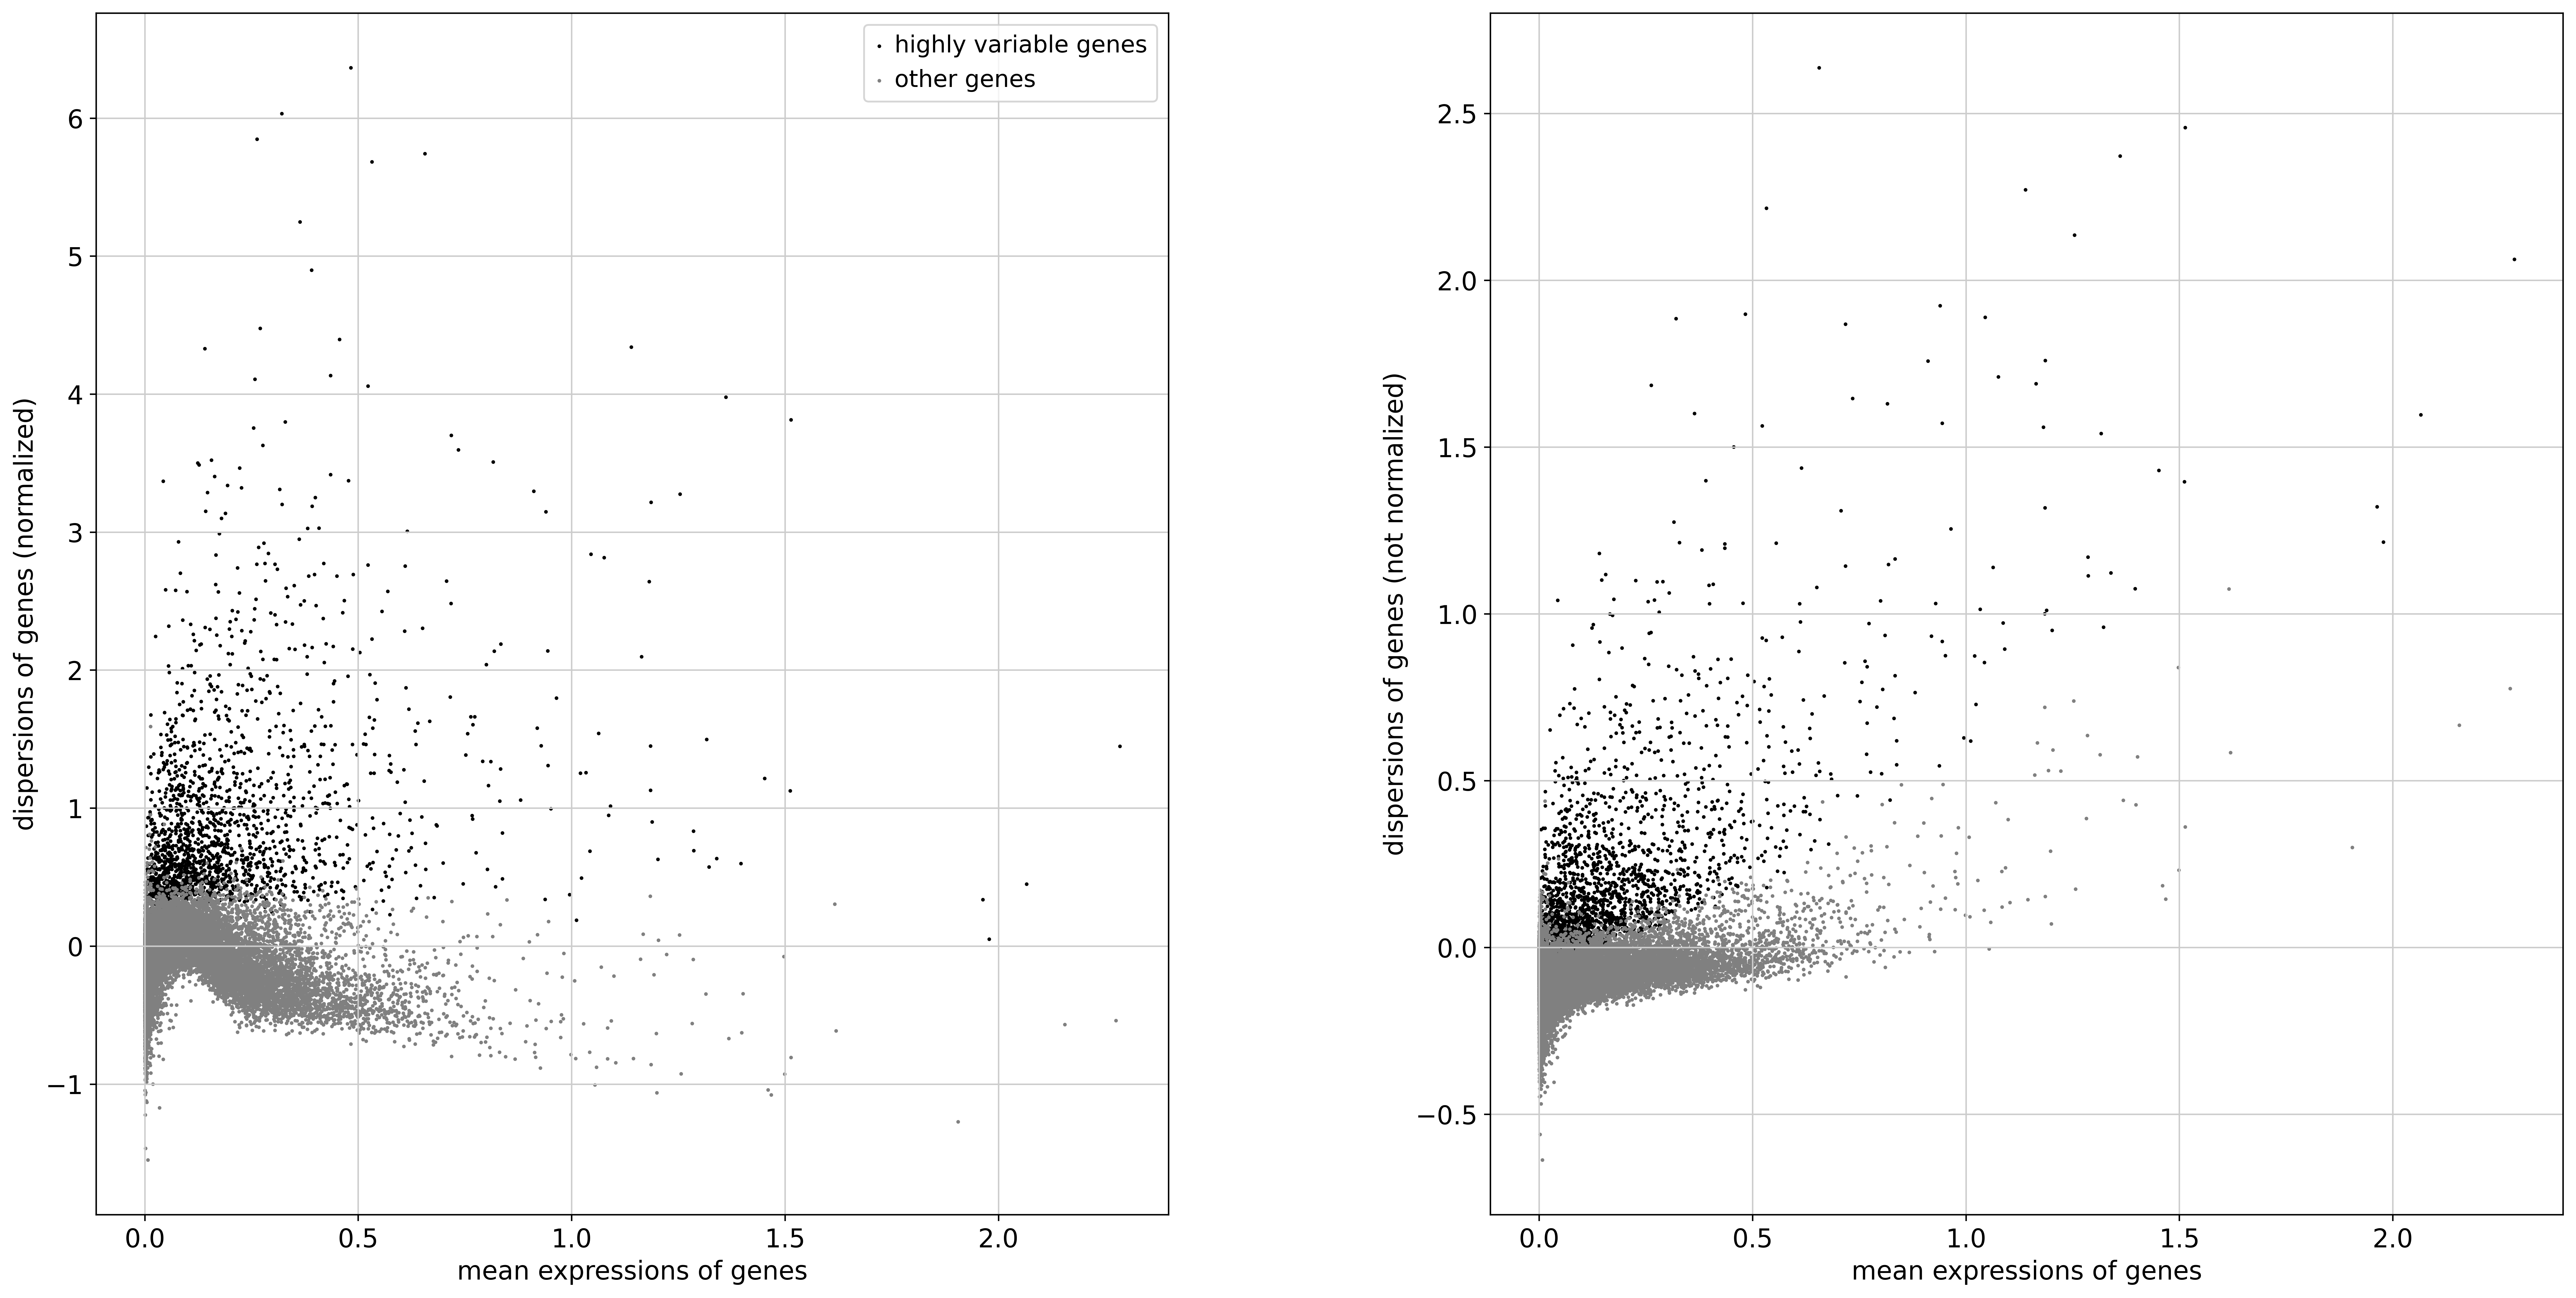

In [23]:
# Option 1: highly variable genes
# Feature selection, genes that are highly variable
sc.pp.highly_variable_genes(adata, n_top_genes=2000, batch_key='RESOLUTION') #compares per cluster
sc.pl.highly_variable_genes(adata)

# Select only the HVG
adata = adata[:, adata.var['highly_variable'] == True]

In [38]:
# Select only the specific markers given in the surface marker list
adata = adata[:, adata.var_names.isin(surface_markers)]
adata.var

In [39]:
# Option 2: l2fc 
# Generate DF of the highly variable genes in clusters in leiden resolution
df = pd.read_csv('/YOUR_PATH_HERE/HVG_RESOLUTION.txt', sep = '\t', index_col = 0)

# Subset the dataframe on specific cluster(s)
df = df[df['cluster'].isin([CLUSTER_NUMBER])]

# Subset the dataframe on a specific high expresson
df = df[df['l2fc']>1.5]

# Select only the genes in the dataframe
adata = adata[:, adata.var_names.isin(df.index)]

,l2fc,padj,scores,cluster
CLDN6,4.656290,0.000000e+00,68.997383,0
KRT18,3.699519,0.000000e+00,63.718002,0
TPM1,3.152779,0.000000e+00,62.941750,0
SLC2A3,4.097211,0.000000e+00,62.879444,0
DSP,3.184081,0.000000e+00,62.671993,0
...,...,...,...,...
CCN1,-5.940061,1.080323e-289,-36.551456,9
GSTP1,-2.508801,0.000000e+00,-37.687527,9
HES1,-6.074222,0.000000e+00,-39.621353,9
ZFP36L1,-5.040789,0.000000e+00,-40.716221,9


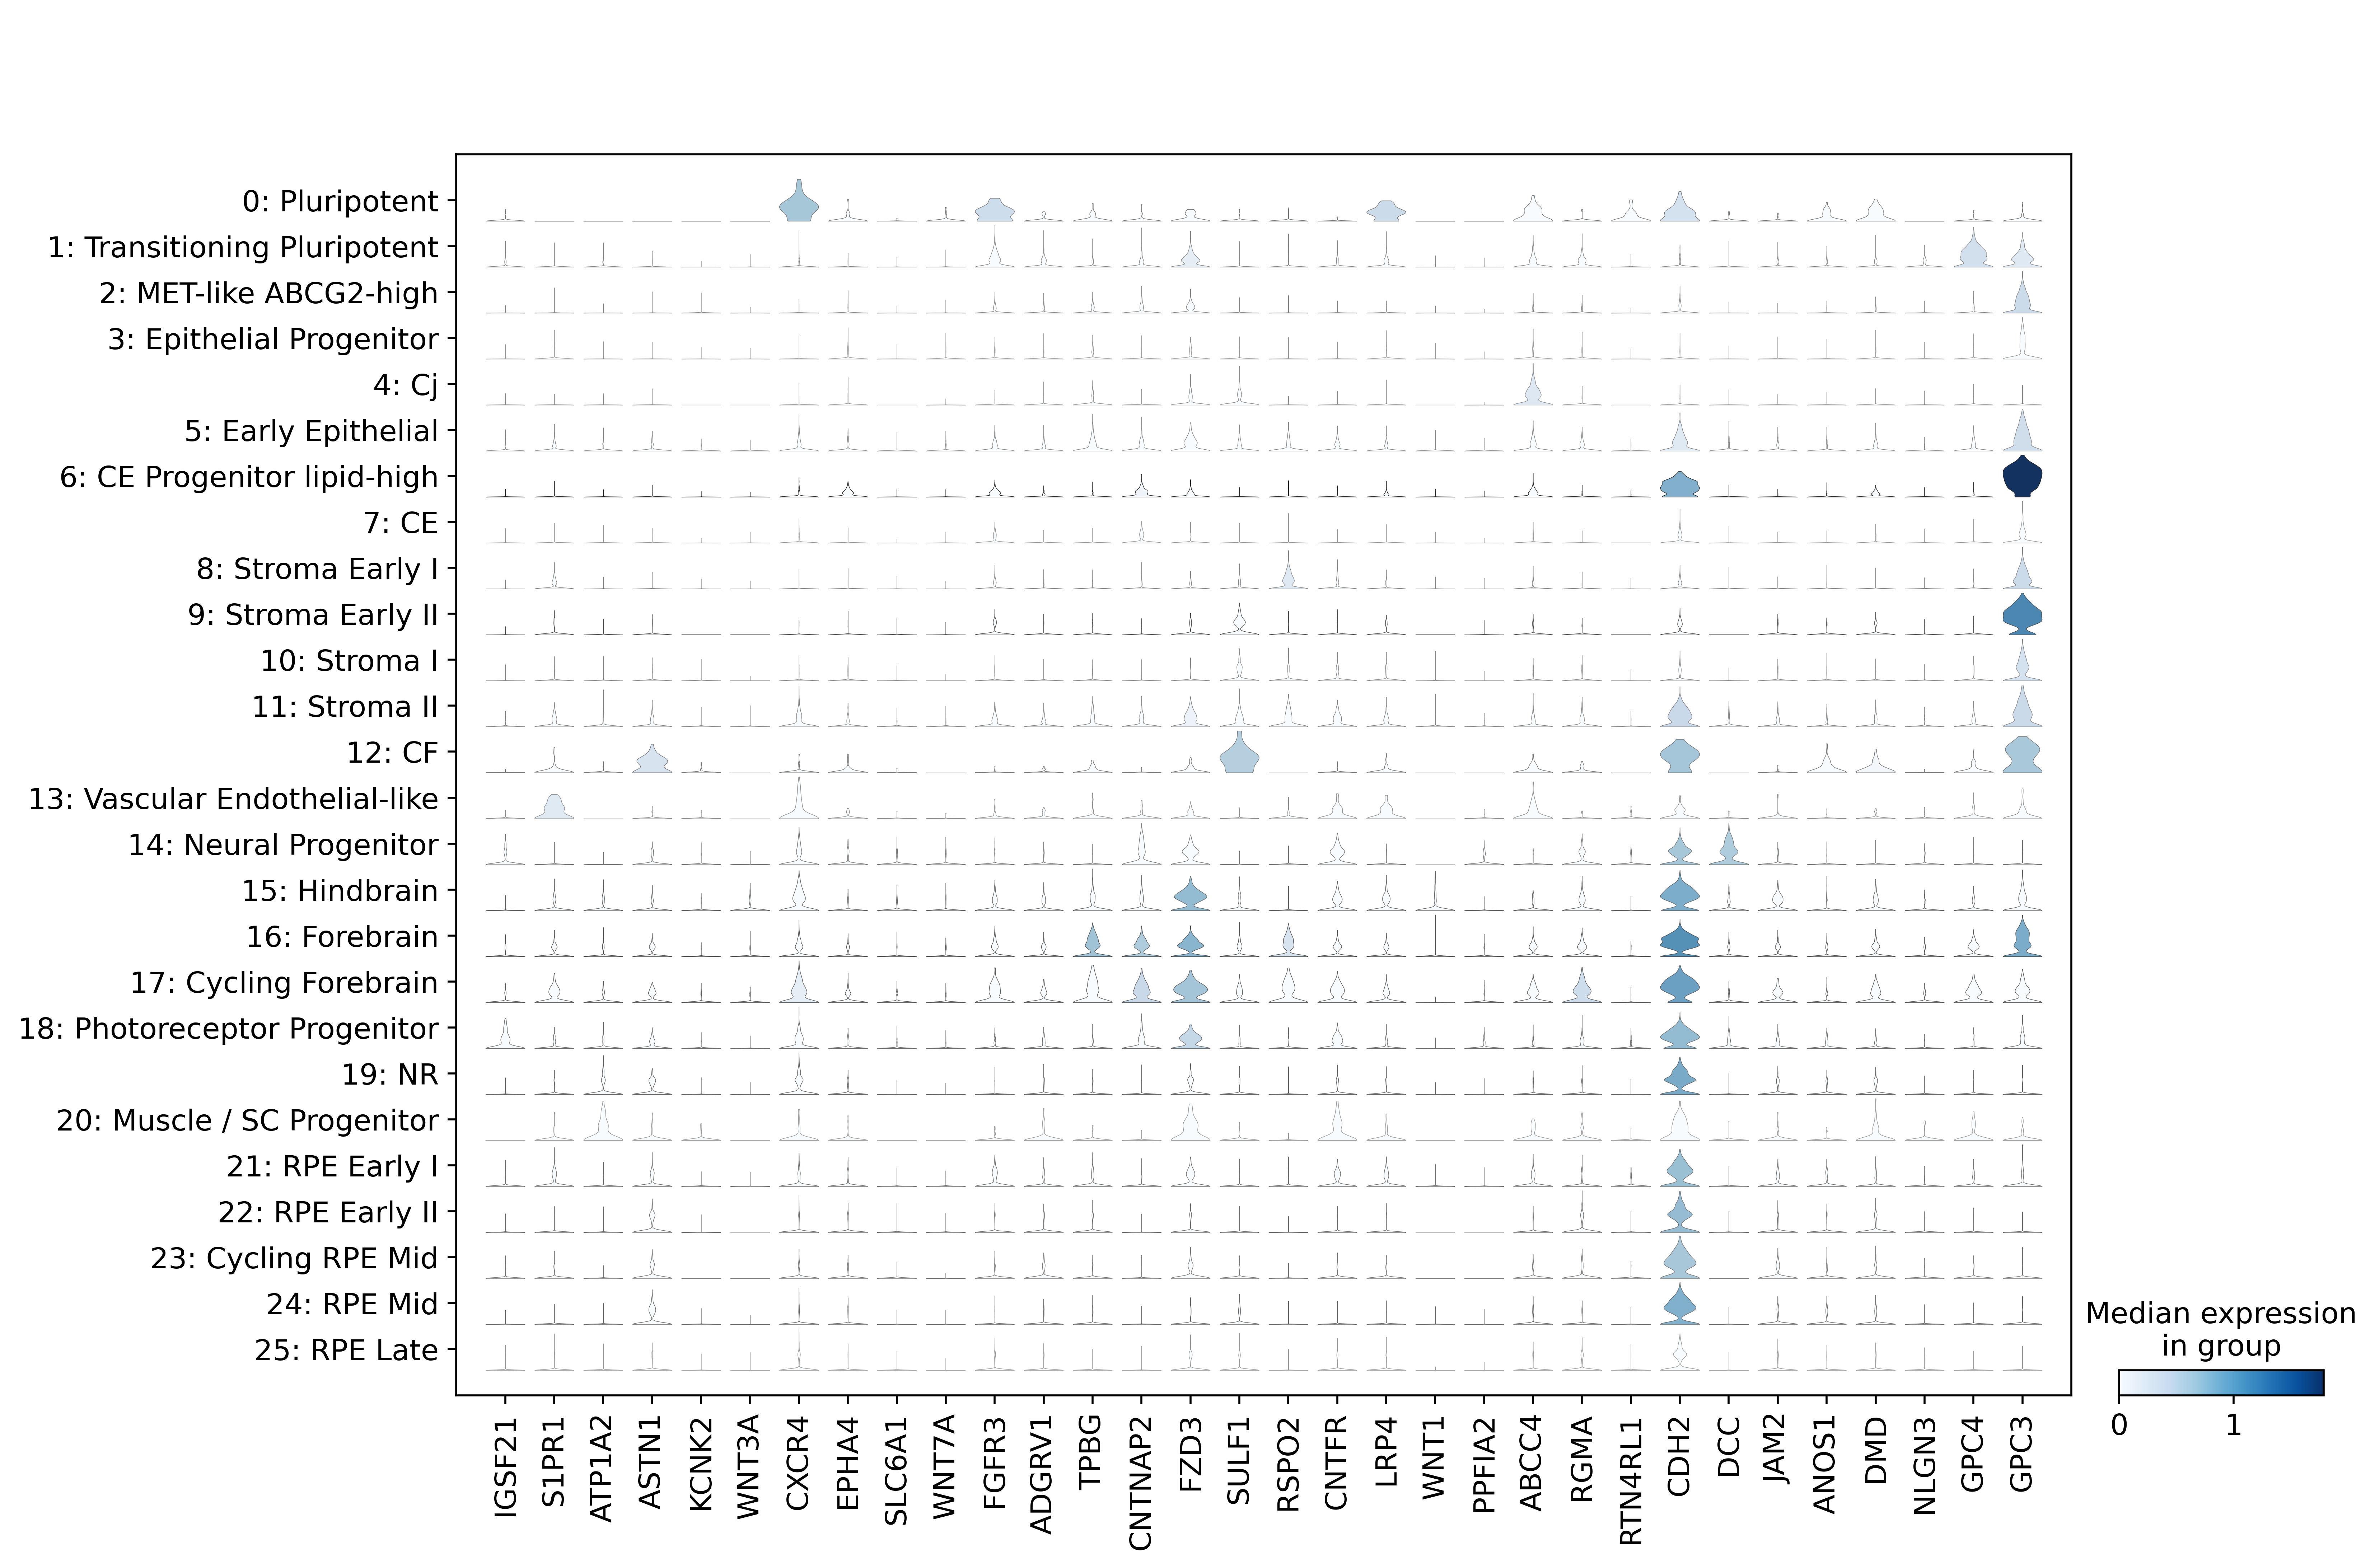

In [44]:
# Plot the surface marker genes in a stacked violin plot
sc.pl.stacked_violin(adata, var_names = adata.var.index , groupby = 'RESOLUTION', save = 'NAME.png')

In [ ]:
# Visualize using UMAP
sc.pl.umap(
        adata,
        color= [''],
        wspace=0.5,
        size= 40,
        ncols = 1,
        title = '',
        legend_fontsize = '', 
        save = 'YOUR_PATH_HERE'
    )